In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
heart = pd.read_csv('heart_v2.csv')
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [3]:
heart.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


__Train Test Split__

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = heart.drop('heart disease' , axis = 1)
y = heart['heart disease']

In [6]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 4)

In [7]:
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt = DecisionTreeClassifier(max_depth = 3)

In [10]:
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=3)

In [11]:
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus , graphviz

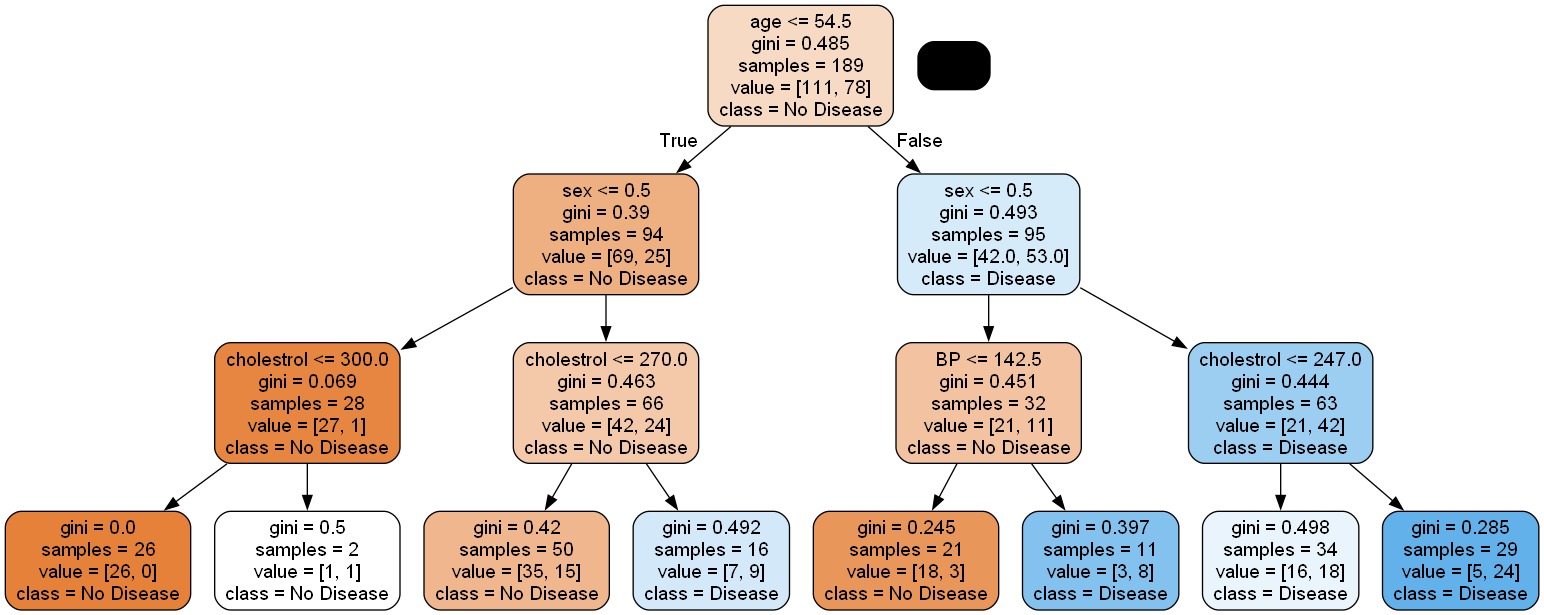

In [12]:
dot_data = StringIO()
export_graphviz(dt , out_file = dot_data , filled = True , rounded = True , feature_names = X.columns,
               class_names = ['No Disease' , 'Disease'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

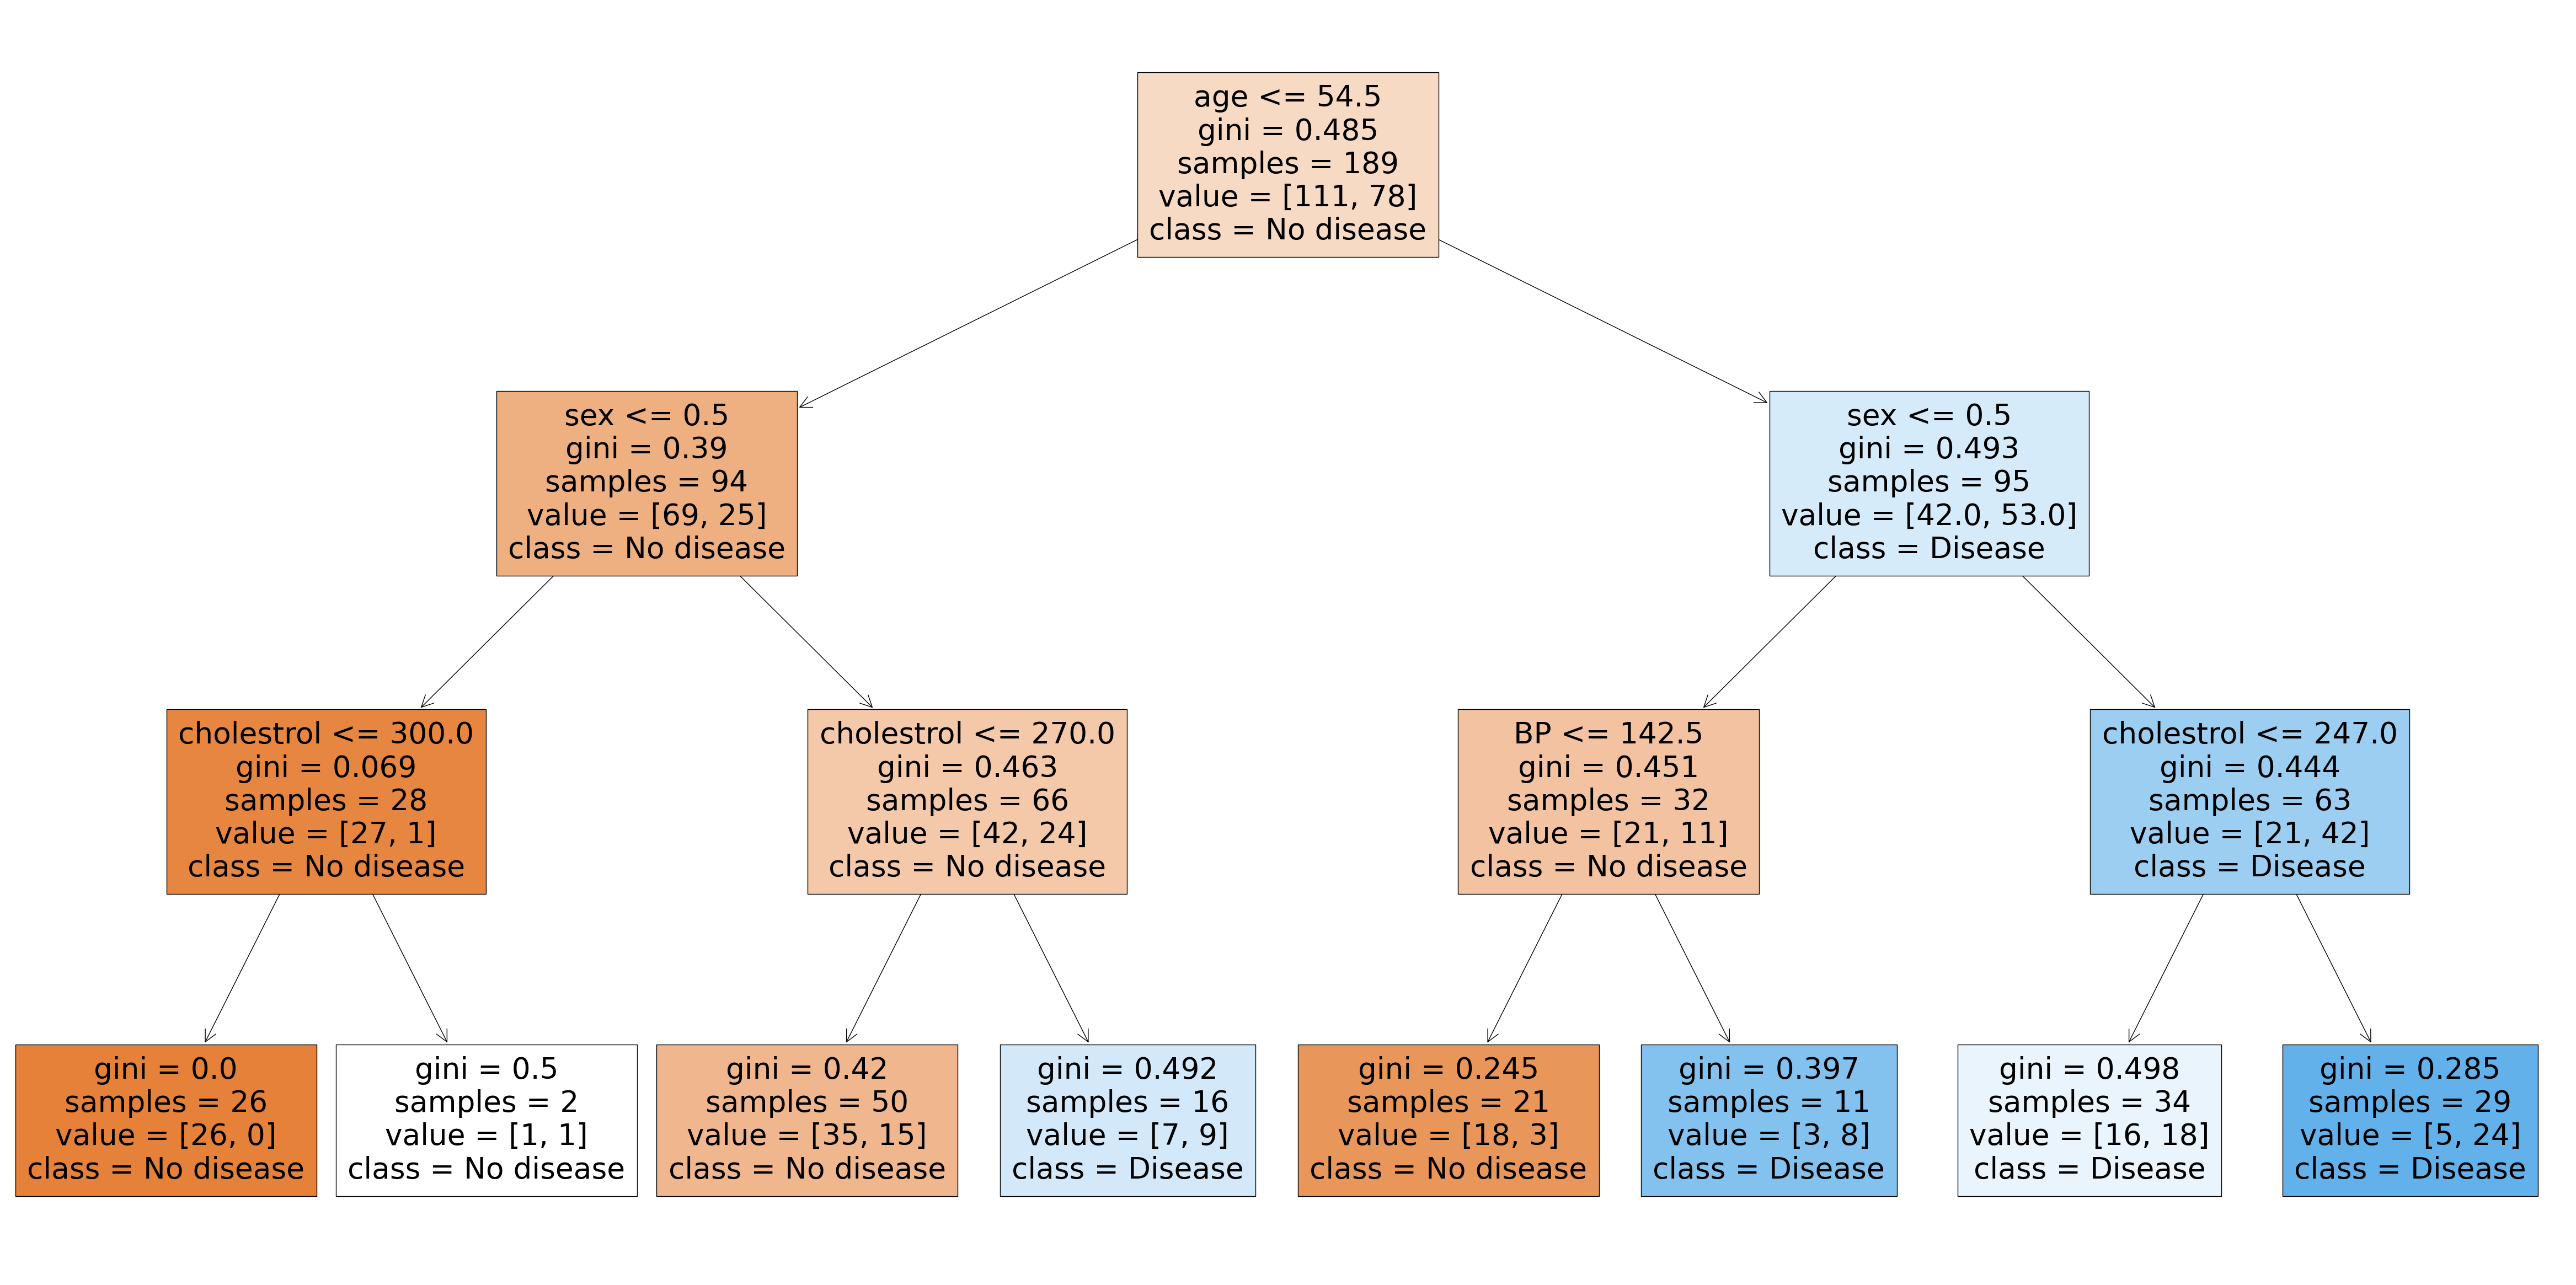

In [13]:
from sklearn.tree import plot_tree
plt.figure(figsize = (60, 30))
plot_tree(dt , feature_names = list(X.columns) , class_names = ['No disease' , 'Disease'] , filled = True )
plt.show()

In [19]:
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn import metrics

__Hyperparameter Tuning__

In [24]:
def dt_get_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier ,out_file = dot_data , filled = True,
                   rounded = True , feature_names = X.columns , class_names = ['No Disease','Disease'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [15]:
def evaluate_model(dt_classifier):
    y_train_pred = dt_classifier.predict(X_train)
    y_test_pred = dt_classifier.predict(X_test)
    print('Train Set Performance')
    print(metrics.accuracy_score(y_train , y_train_pred))
    print(metrics.confusion_matrix(y_train , y_train_pred))
    print('Test Set Performance')
    print(metrics.accuracy_score(y_test , y_test_pred))
    print(metrics.confusion_matrix(y_test , y_test_pred))

In [20]:
evaluate_model(dt)

Train Set Performance
0.7354497354497355
[[80 31]
 [19 59]]
Test Set Performance
0.6419753086419753
[[26 13]
 [16 26]]


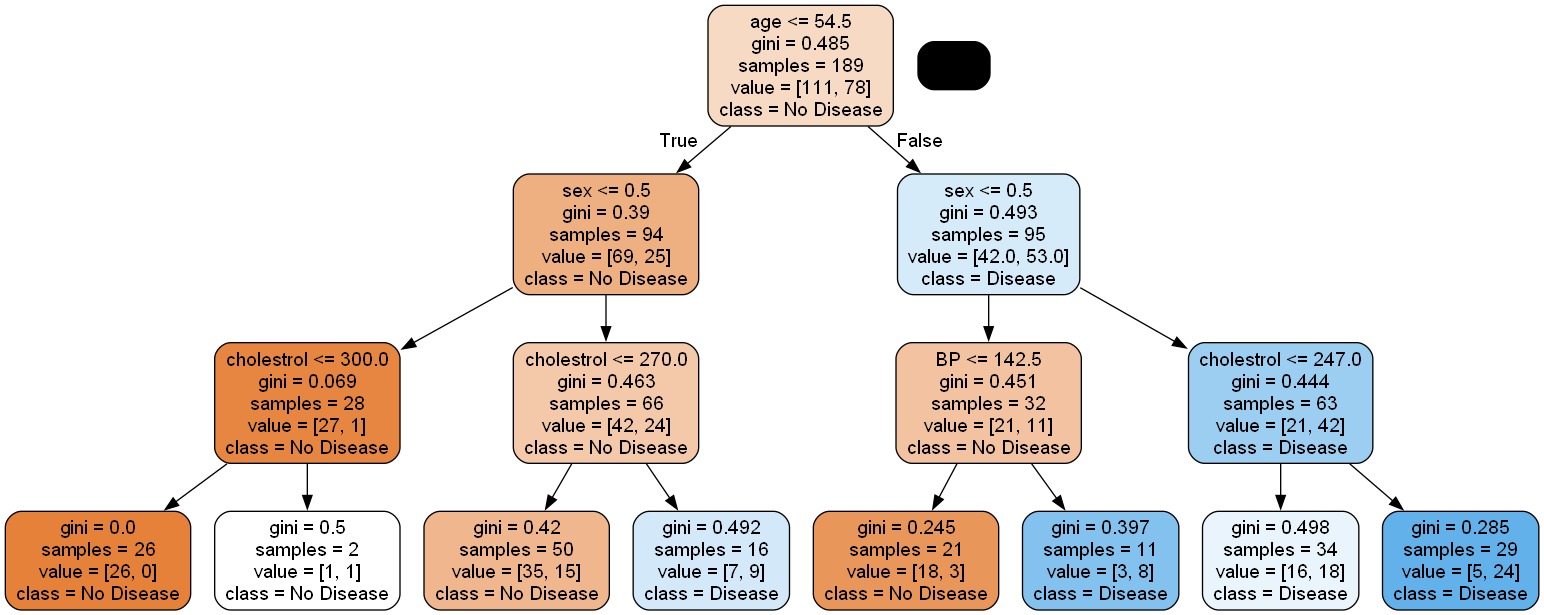

In [26]:
dt_get_graph(dt)
Image(graph.create_png())

__Default__

In [28]:
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train , y_train)

DecisionTreeClassifier()

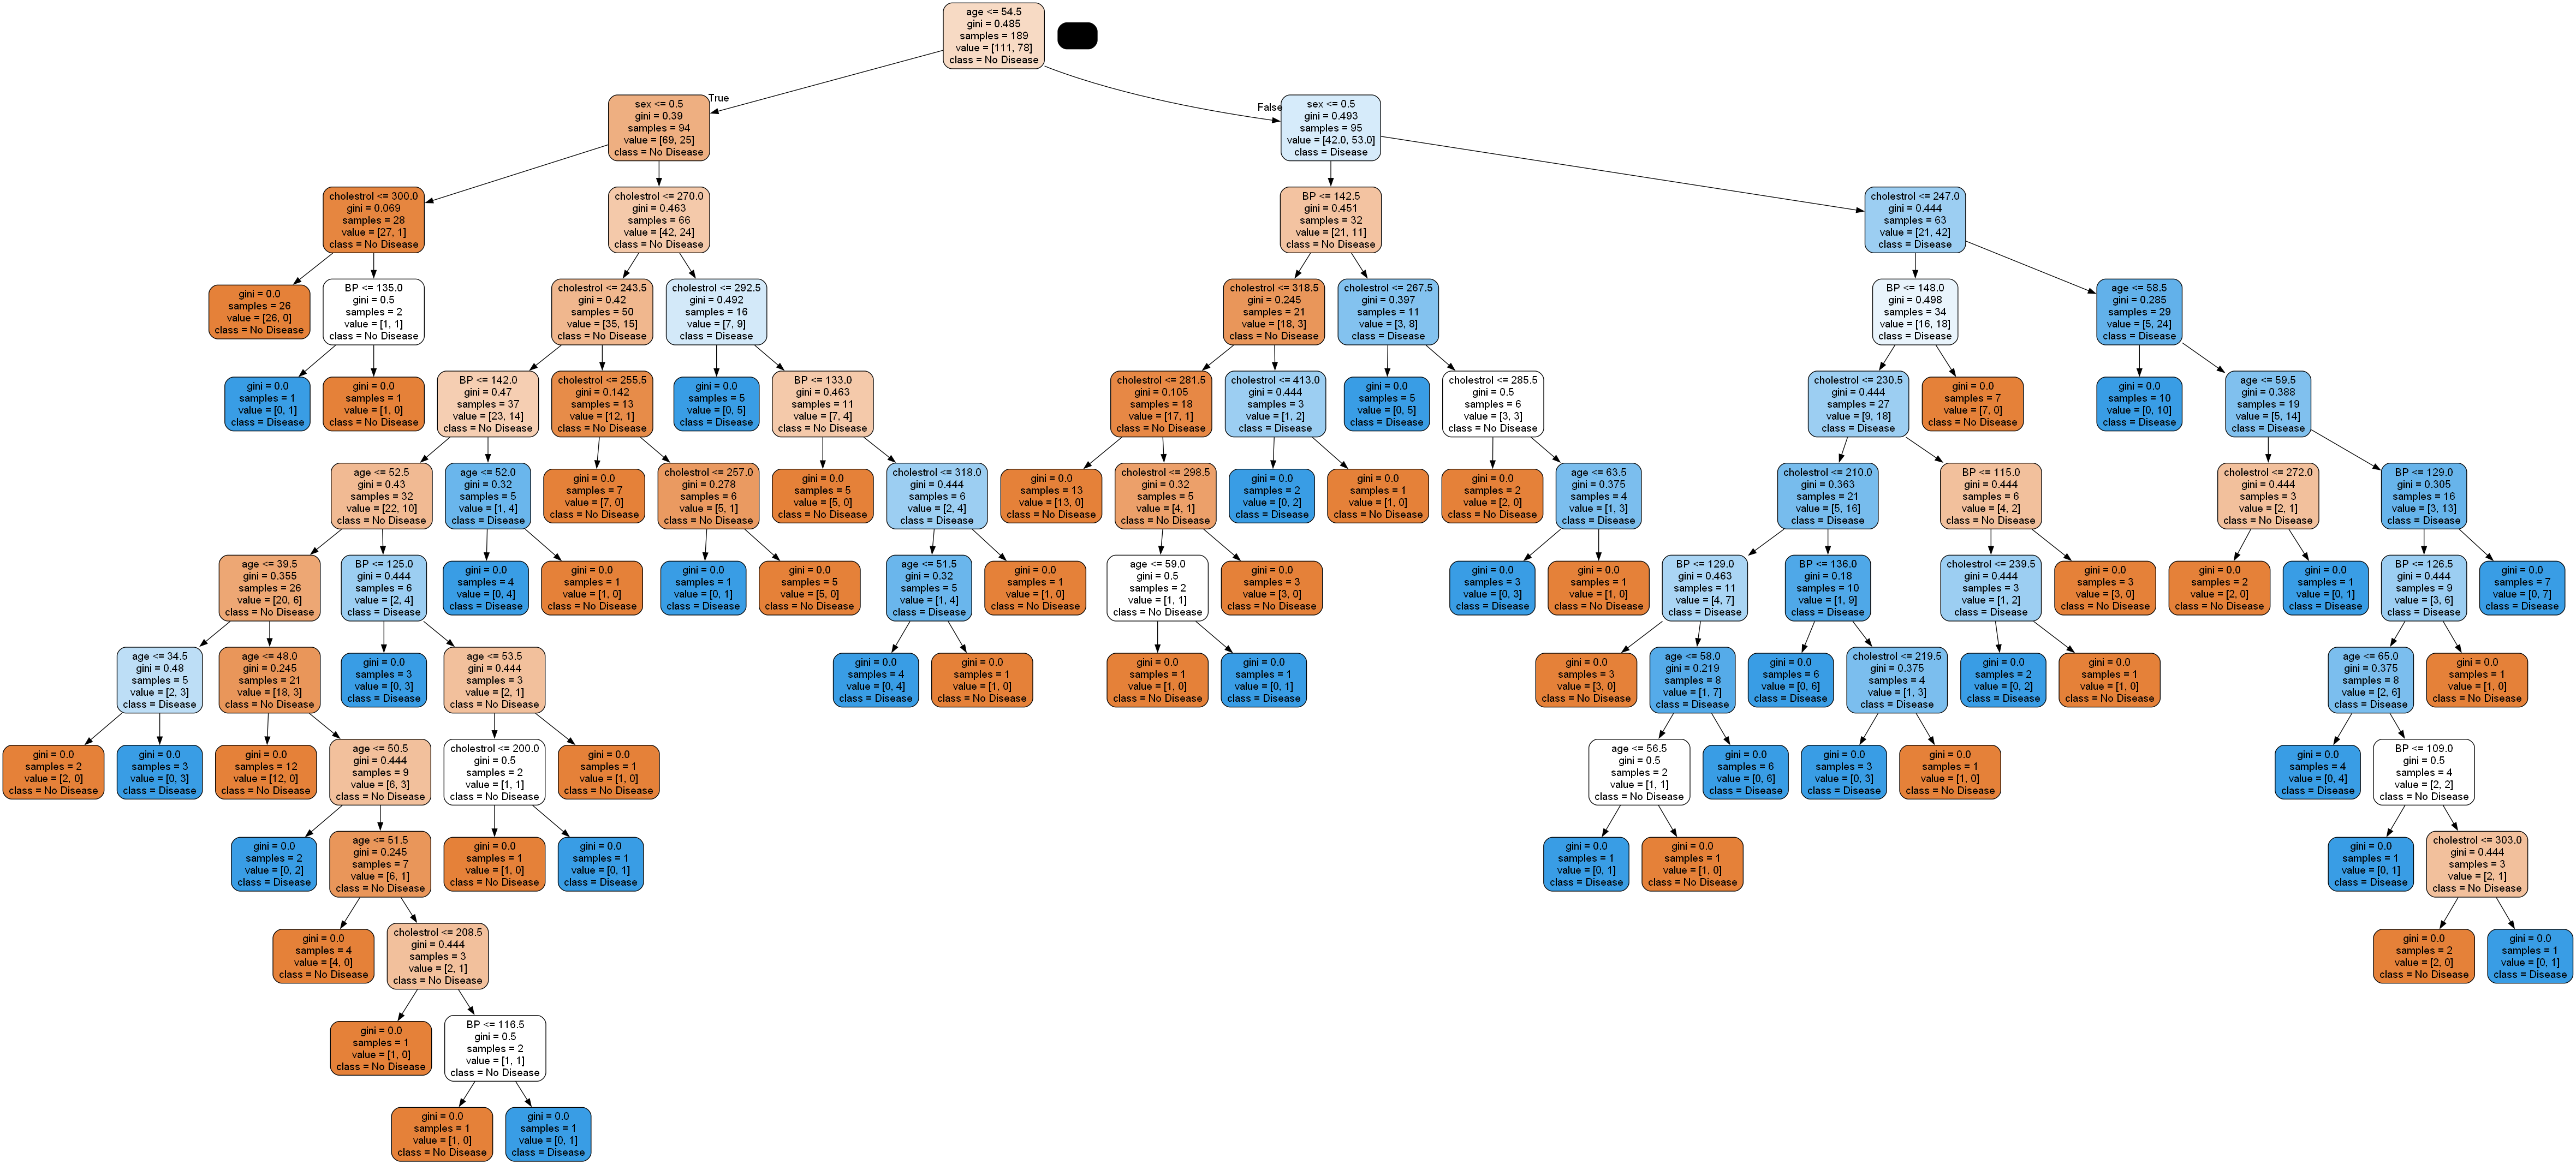

In [29]:
graph = dt_get_graph(dt_default)
Image(graph.create_png())

In [30]:
evaluate_model(dt_default)

Train Set Performance
1.0
[[111   0]
 [  0  78]]
Test Set Performance
0.5925925925925926
[[24 15]
 [18 24]]


__Giving max_depth__

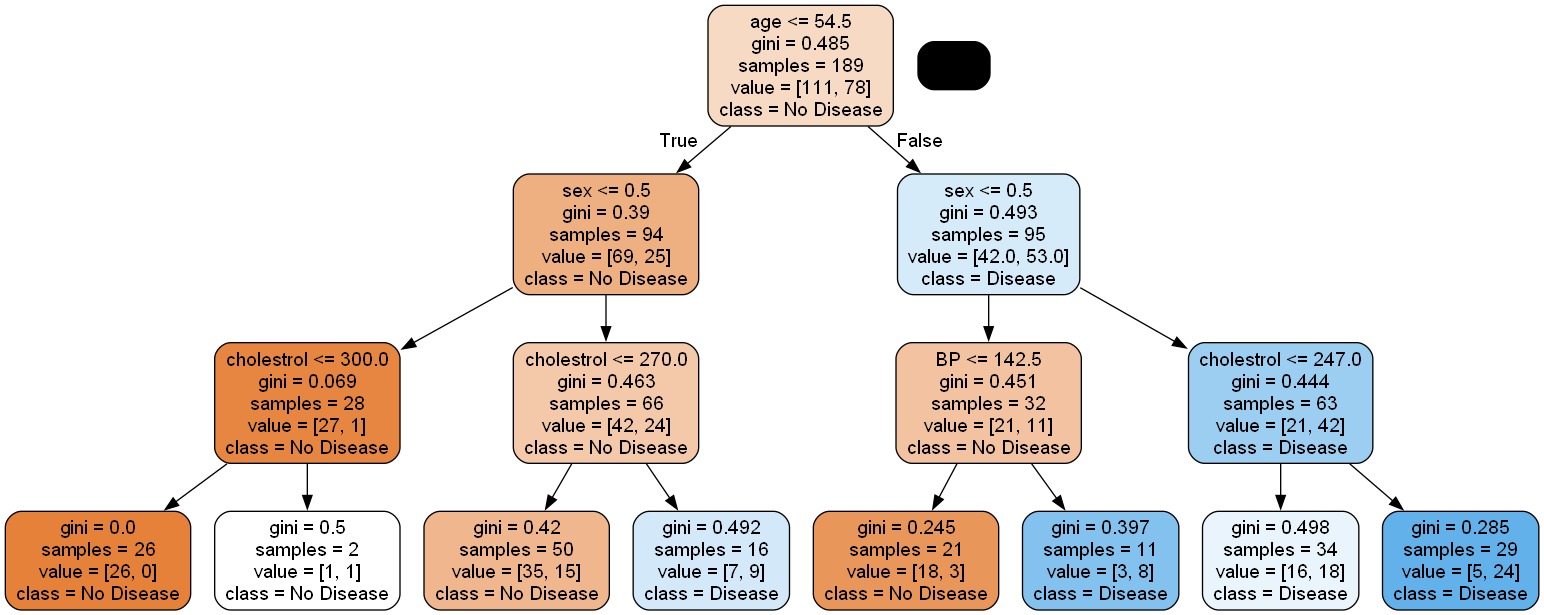

In [35]:
dt_depth = DecisionTreeClassifier(max_depth = 3 , random_state = 42)
dt_depth.fit(X_train , y_train)
graph = dt_get_graph(dt_depth)
Image(graph.create_png())

In [36]:
evaluate_model(dt_depth)

Train Set Performance
0.7354497354497355
[[80 31]
 [19 59]]
Test Set Performance
0.6419753086419753
[[26 13]
 [16 26]]


__Maximum samples for split__

In [38]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20 , random_state = 42)
dt_min_split.fit(X_train , y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

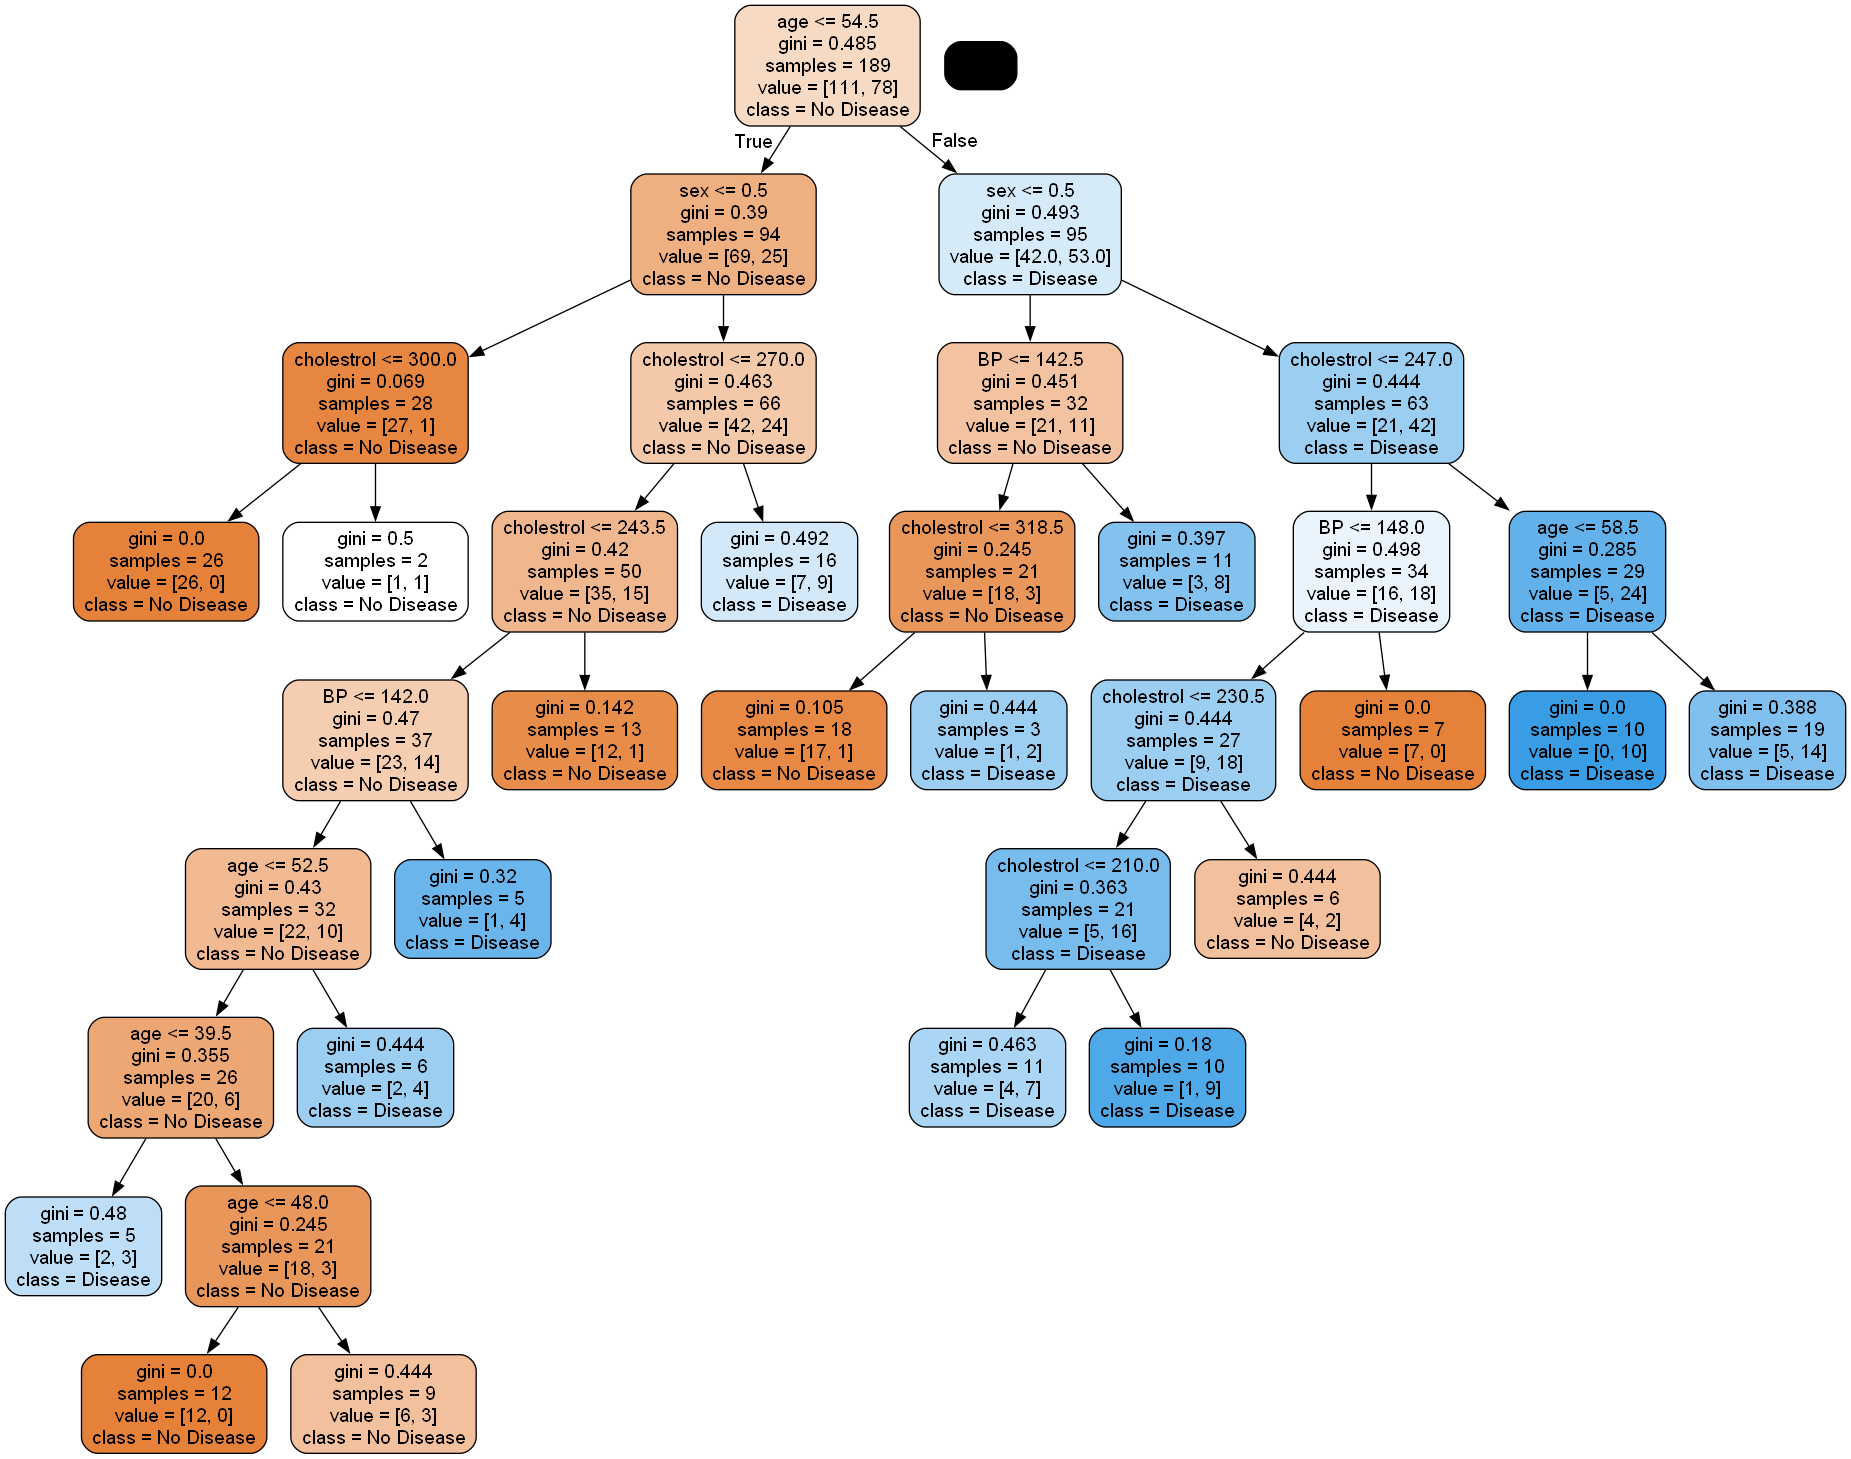

In [39]:
graph = dt_get_graph(dt_min_split)
Image(graph.create_png())

In [40]:
evaluate_model(dt_min_split)

Train Set Performance
0.8201058201058201
[[85 26]
 [ 8 70]]
Test Set Performance
0.5432098765432098
[[21 18]
 [19 23]]


__Minimum samples at leaf__

In [41]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20 , random_state = 42)
dt_min_leaf.fit(X_train , y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

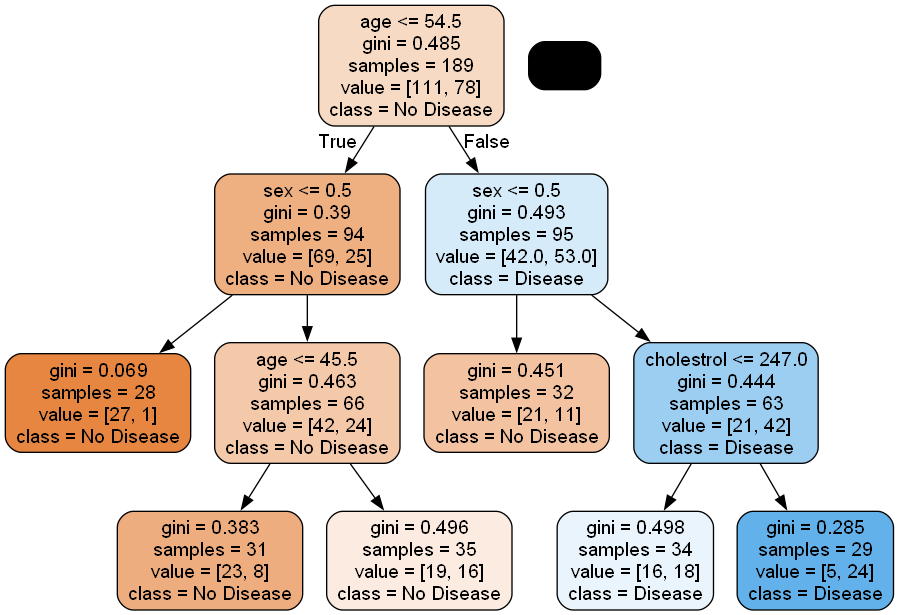

In [43]:
graph = dt_get_graph(dt_min_leaf)
Image(graph.create_png())

In [44]:
evaluate_model(dt_min_leaf)

Train Set Performance
0.6984126984126984
[[90 21]
 [36 42]]
Test Set Performance
0.654320987654321
[[33  6]
 [22 20]]


In [45]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20 , random_state = 42 , criterion = 'entropy')
dt_min_leaf_entropy.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

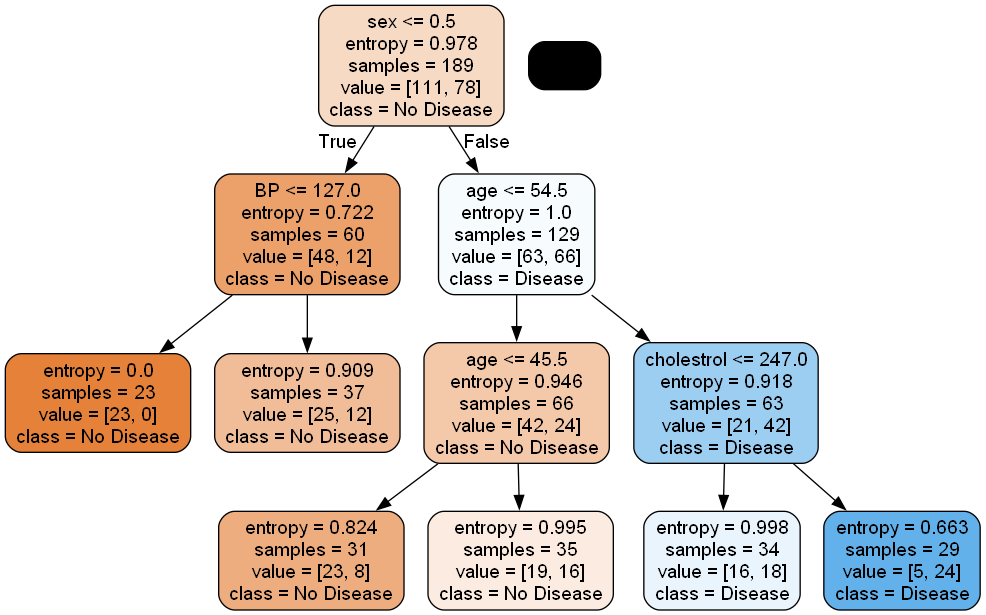

In [46]:
graph = dt_get_graph(dt_min_leaf_entropy)
Image(graph.create_png())

In [47]:
evaluate_model(dt_min_leaf_entropy)

Train Set Performance
0.6984126984126984
[[90 21]
 [36 42]]
Test Set Performance
0.654320987654321
[[33  6]
 [22 20]]


__Using GridsearchCV__

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
dt = DecisionTreeClassifier(random_state = 42)

In [55]:
param = {'max_depth': [2,3,5 ,10 , 20] , 'min_samples_leaf' : [5,10,20,50,100],
        'criterion' : ['gini' , 'entropy']}

In [57]:
grid = GridSearchCV(estimator = dt , param_grid=param ,
                   cv = 4,n_jobs = -1 , verbose = 1 ,scoring ='accuracy')

In [58]:
%%time
grid.fit(X_train , y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: total: 234 ms
Wall time: 7.04 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [61]:
cv_df = pd.DataFrame(grid.cv_results_)
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006287,0.006644,0.011832,0.006834,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.583333,0.617021,0.659574,0.617021,0.619238,0.027046,24
1,0.011743,0.006780,0.003915,0.006780,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.583333,0.617021,0.659574,0.638298,0.624557,0.028157,19
2,0.008456,0.007242,0.007230,0.005591,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.562500,0.617021,0.659574,0.638298,0.619348,0.036105,23
3,0.007903,0.005645,0.000000,0.000000,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.687500,0.617021,0.574468,0.702128,0.645279,0.052027,5
4,0.008205,0.008222,0.000000,0.000000,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.583333,0.574468,0.595745,0.595745,0.587323,0.008986,40
5,0.007546,0.007557,0.003915,0.006782,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.541667,0.680851,0.595745,0.574468,0.598183,0.051470,34
6,0.011728,0.006771,0.003906,0.006766,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.708333,0.723404,0.617021,0.617021,0.666445,0.049710,1
7,0.011717,0.006765,0.005975,0.006515,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.583333,0.617021,0.659574,0.617021,0.619238,0.027046,24
8,0.007740,0.000311,0.000000,0.000000,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.687500,0.617021,0.574468,0.702128,0.645279,0.052027,5
9,0.005809,0.006479,0.007838,0.007838,gini,3,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.583333,0.574468,0.595745,0.595745,0.587323,0.008986,40


In [62]:
cv_df.nlargest(5 , 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
6,0.011728,0.006771,0.003906,0.006766,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.708333,0.723404,0.617021,0.617021,0.666445,0.049710,1
11,0.004520,0.004520,0.002260,0.003914,gini,5,10,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.583333,0.723404,0.617021,0.659574,0.645833,0.052303,2
16,0.000000,0.000000,0.008572,0.008612,gini,10,10,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.583333,0.723404,0.617021,0.659574,0.645833,0.052303,2
21,0.010022,0.005767,0.004420,0.005164,gini,20,10,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.583333,0.723404,0.617021,0.659574,0.645833,0.052303,2
3,0.007903,0.005645,0.000000,0.000000,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.687500,0.617021,0.574468,0.702128,0.645279,0.052027,5


In [64]:
grid.best_score_

0.666445035460993

In [65]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42)

In [66]:
dt_best = grid.best_estimator_

In [67]:
evaluate_model(dt_best)

Train Set Performance
0.7354497354497355
[[80 31]
 [19 59]]
Test Set Performance
0.6419753086419753
[[26 13]
 [16 26]]


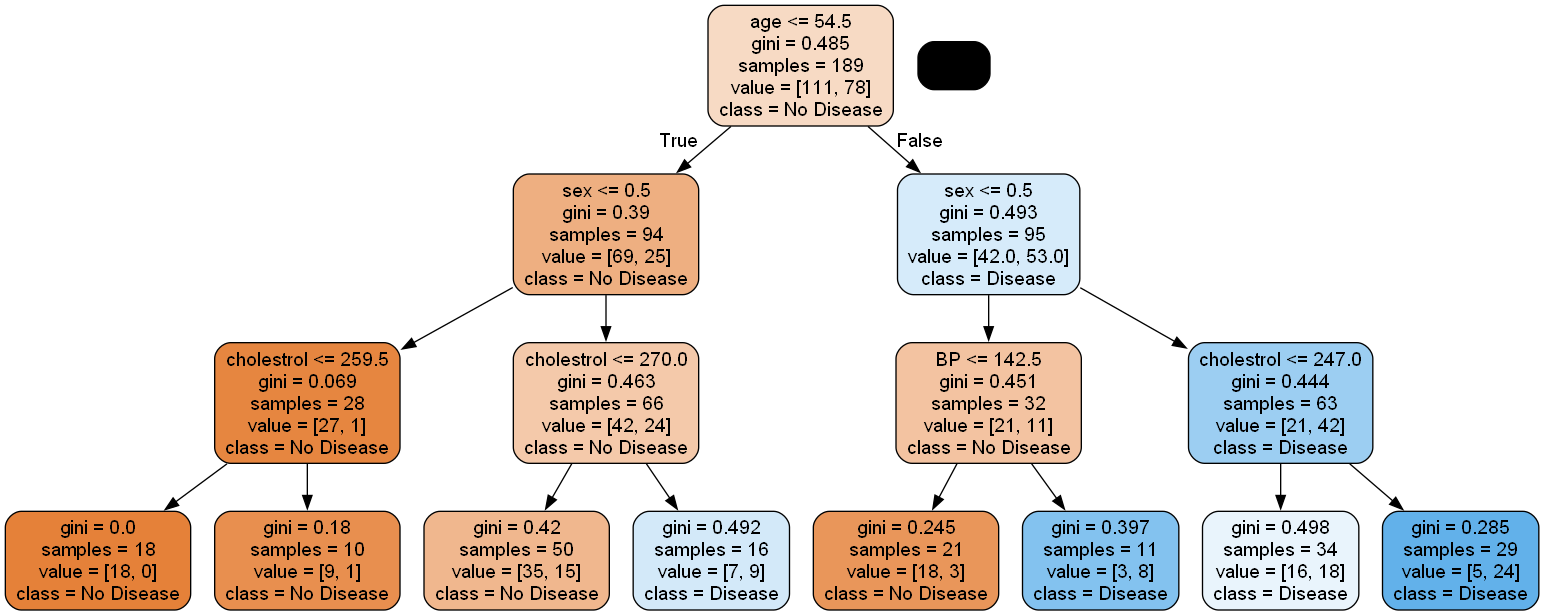

In [69]:
Image(dt_get_graph(dt_best).create_png())